# Airline Satisfaction

# Importing Libraires

In [1]:
import pandas as pd
import numpy as np
pd. set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.preprocessing import RobustScaler

## Reading Dataset

In [2]:
df=pd.read_csv("ML5 Decision Tree Airline Satisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Getting Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   id                                 10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   Customer Type                      10000 non-null  object 
 4   Age                                10000 non-null  int64  
 5   Type of Travel                     10000 non-null  object 
 6   Class                              10000 non-null  object 
 7   Flight Distance                    10000 non-null  int64  
 8   Inflight wifi service              10000 non-null  int64  
 9   Departure/Arrival time convenient  10000 non-null  int64  
 10  Ease of Online booking             10000 non-null  int64  
 11  Gate location                      10000 non-null  int6

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df['Departure Delay in Minutes'].max()

1305

## Checking Datatypes & droping Unnecessary Columns

In [7]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [8]:
df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
df=df.drop(['id'],axis=1)

In [10]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
df["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

## Replcing ( ) with (_) in Column Names

In [12]:
df.columns=['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

In [13]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [15]:
df.shape

(10000, 23)

### Checking for Null values & droping Null Values

In [17]:
df.isna().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(9974, 23)

### Outlier Removal

In [18]:
df["zscore_Departure_Delay_in_Minutes"]=(df["Departure_Delay_in_Minutes"]-df["Departure_Delay_in_Minutes"].mean())/df["Departure_Delay_in_Minutes"].std()
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,zscore_Departure_Delay_in_Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.267256
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,-0.360205
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,-0.386349
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,-0.098763
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,-0.386349


In [19]:
df=df[(df["zscore_Departure_Delay_in_Minutes"]<3) & (df["zscore_Departure_Delay_in_Minutes"]>-3)]
df.shape

(9752, 24)

In [20]:
df["zscore_Arrival_Delay_in_Minutes"]=(df["Arrival_Delay_in_Minutes"]-df["Arrival_Delay_in_Minutes"].mean())/df["Arrival_Delay_in_Minutes"].std()
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,zscore_Departure_Delay_in_Minutes,zscore_Arrival_Delay_in_Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.267256,0.312414
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,-0.360205,-0.226628
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,-0.386349,-0.496149
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,-0.098763,-0.091867
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,-0.386349,-0.496149


In [21]:
df=df[(df["zscore_Arrival_Delay_in_Minutes"]<3) & (df["zscore_Arrival_Delay_in_Minutes"]>-3)]
df=df.drop(['zscore_Departure_Delay_in_Minutes',"zscore_Arrival_Delay_in_Minutes"],axis=1)
df.shape

(9465, 23)

In [22]:
df.shape

(9465, 23)

### EDA

### Bar Chart of Satisfaction Count

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

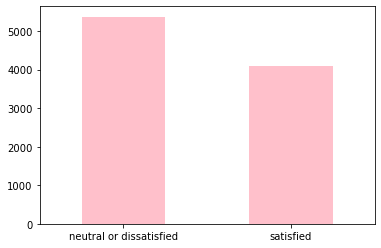

In [23]:
df['satisfaction'].value_counts().plot(kind='bar',color='pink')
plt.xticks(rotation=0)

Text(0.5, 0, 'Avg.Flight Distance')

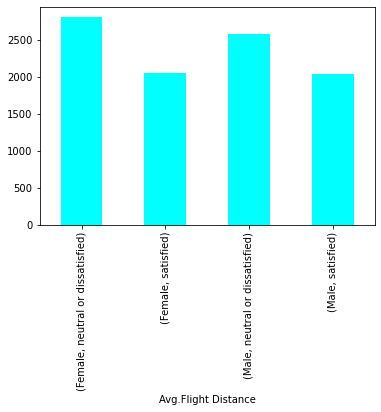

In [24]:
df.groupby(['Gender'])['satisfaction'].value_counts().plot(kind='bar',color='cyan')
plt.xlabel('Avg.Flight Distance')

### Boxplot of Flight Distance

<AxesSubplot:xlabel='Flight_Distance'>

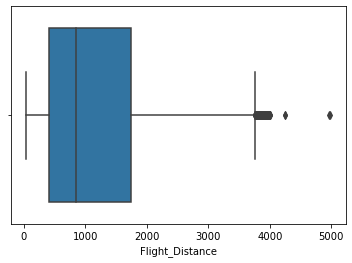

In [25]:
sns.boxplot(data=df,x="Flight_Distance")

In [26]:
df["Flight_Distance"].unique()

array([ 460,  235, 1142, ..., 3524, 3673, 1319], dtype=int64)

### Boxplot of Checkin Service

<AxesSubplot:xlabel='Checkin_service'>

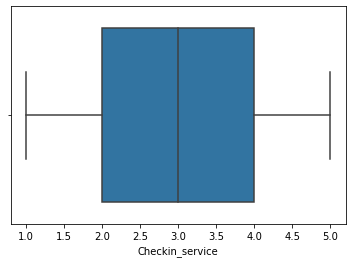

In [27]:
sns.boxplot(data=df,x="Checkin_service")

### Histograms Of all Columns

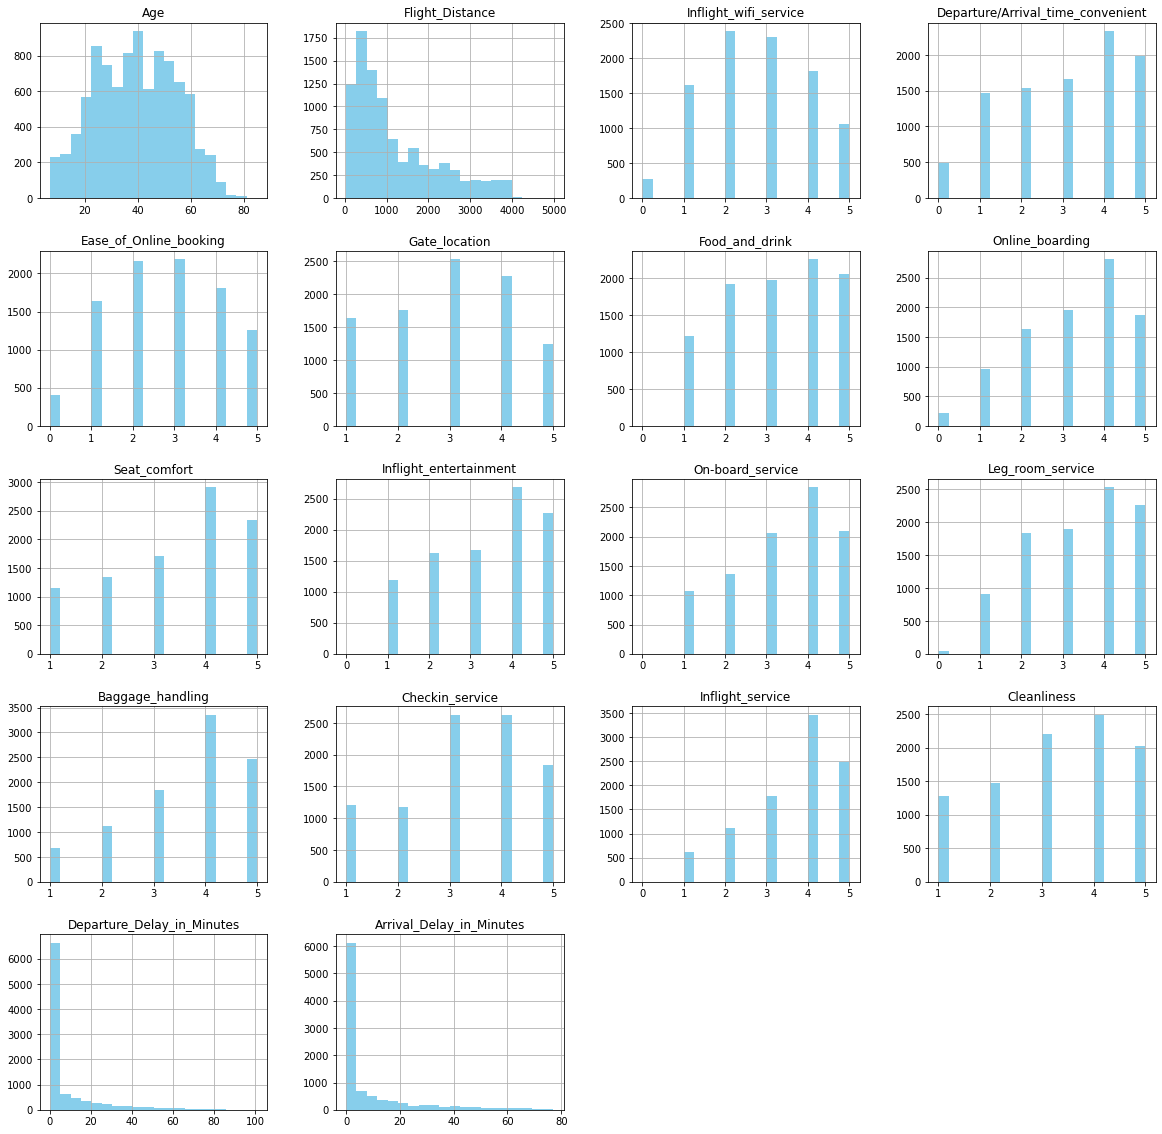

In [28]:
df.hist(bins=20,color='skyblue',figsize=(20,20));

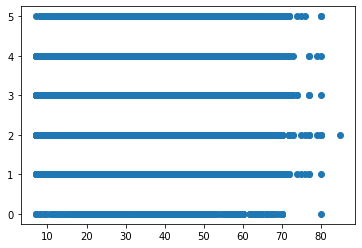

In [29]:
plt.scatter(data=df,x='Age',y='Ease_of_Online_booking')

### Getting Correlation of Dataset by Heatmap

<AxesSubplot:>

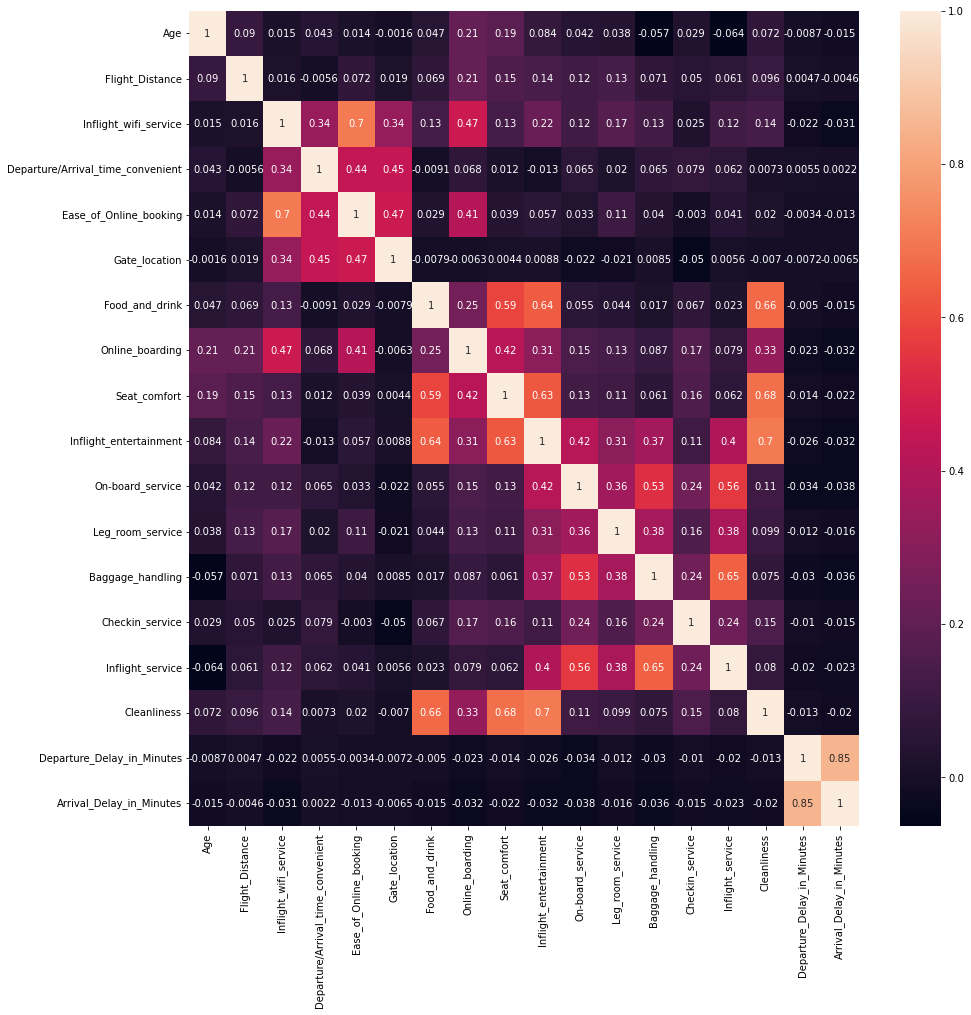

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### LabelEncoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labelencoder=LabelEncoder()

In [33]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [34]:
df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']]=df[['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']].apply(labelencoder.fit_transform)

In [35]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


### Scaling

In [36]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [37]:
std_scaler=StandardScaler()

In [38]:
df[['Age','Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']]=std_scaler.fit_transform(df[['Age','Flight_Distance','Departure_Delay_in_Minutes','Arrival_Delay_in_Minutes']])

In [39]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,-1.741194,1,2,-0.735777,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.079516,0.635101,0
1,1,1,-0.948101,0,0,-0.960069,3,2,3,3,1,3,1,1,1,5,3,1,4,1,-0.452945,-0.147858,0
2,0,0,-0.882010,0,0,-0.055926,2,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.516798,-0.539337,1
3,0,0,-0.948101,0,0,-0.634099,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0.185581,0.047882,0
4,1,0,1.431177,0,0,-0.981003,3,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.516798,-0.539337,1


### Defining Objects for Features & Target

In [40]:
features=df.drop(['satisfaction'],axis=1)

In [41]:
target=df["satisfaction"]

### Model Initialization

### Splitting Data and Calling Model Decision Tree Classifire

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=10)

In [44]:
model=DecisionTreeClassifier()

In [45]:
model.fit(features_train,target_train)

DecisionTreeClassifier()

In [46]:
predicted_satisfaction=model.predict(features_test)

### Accuracy Checking, Ploting Text Representation and confusion_matrix

In [47]:
model.score(features_train,target_train)

1.0

In [48]:
model.score(features_test,target_test)

0.9223454833597464

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1058
           1       0.90      0.92      0.91       835

    accuracy                           0.92      1893
   macro avg       0.92      0.92      0.92      1893
weighted avg       0.92      0.92      0.92      1893



<AxesSubplot:>

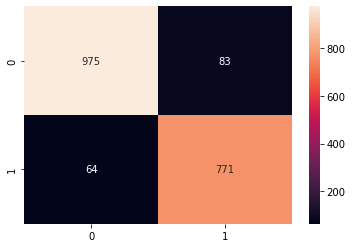

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(target_test,predicted_satisfaction))
sns.heatmap(confusion_matrix(target_test,predicted_satisfaction),annot=True,fmt='d')

In [50]:
print(export_text(model))

|--- feature_11 <= 3.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_6 <= 3.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_13 <= 3.50
|   |   |   |   |   |--- feature_19 <= 4.50
|   |   |   |   |   |   |--- feature_7 <= 3.50
|   |   |   |   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_12 <= 4.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_12 >  4.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_14 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_10 >  1.50
|   |   |   |   |   |   |   |   |--- feature_15 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- feature_17 <= 4.50
|   |   |   |   |   |   |   |

## We can Apply All the algorithm 

In [53]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [54]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis(),
        'xgb':XGBClassifier()
       }

In [55]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n')

lr confuion matrix: 
 [[965  93]
 [142 693]]
lr accuracy score: 0.8758584257791865
lr precision score: 0.8816793893129771
lr recall score: 0.829940119760479
lr classification report :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1058
           1       0.88      0.83      0.86       835

    accuracy                           0.88      1893
   macro avg       0.88      0.87      0.87      1893
weighted avg       0.88      0.88      0.88      1893


sg confuion matrix: 
 [[1025   33]
 [ 240  595]]
sg accuracy score: 0.8557844690966719
sg precision score: 0.947452229299363
sg recall score: 0.7125748502994012
sg classification report :
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1058
           1       0.95      0.71      0.81       835

    accuracy                           0.86      1893
   macro avg       0.88      0.84      0.85      1893
weighted avg       0.87   

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


xgb confuion matrix: 
 [[1019   39]
 [  57  778]]
xgb accuracy score: 0.9492868462757528
xgb precision score: 0.9522643818849449
xgb recall score: 0.9317365269461078
xgb classification report :
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1058
           1       0.95      0.93      0.94       835

    accuracy                           0.95      1893
   macro avg       0.95      0.95      0.95      1893
weighted avg       0.95      0.95      0.95      1893




### XGboost ,AdaBoost & Random Forest Gives BHest Accuracy